In [1]:
import numpy as np

In [5]:
def rx(beta):
    return np.array([[np.cos(beta), -1j* np.sin(beta)], [-1j * np.sin(beta), np.cos(beta)]])

In [45]:
def rx_multi(n, beta):
    x = rx(beta)
    for _ in range(n - 1):
        x = np.kron(x, rx(beta))
    return x

def permute(x, i, j):
    k = x[i]
    x[i] = x[j]
    x[j] = k

In [97]:
np.random.seed(23905)
state = np.random.randn(1 << 3)
state /= np.sqrt(np.sum(np.abs(state) ** 2))

gate = rx_multi(3, 1)
gate2 = rx_multi(3, -1)

In [98]:
gate @ state

array([-0.09077474+0.33960044j,  0.14927426+0.27252847j,
        0.22964445-0.46303038j,  0.16715833-0.32531604j,
       -0.04738035+0.29010545j, -0.31642463+0.10612451j,
        0.15587228-0.01904464j,  0.37955762-0.1116015j ])

In [102]:
permute(state, 0, 7)
state2 = gate @ state
# permute(state2, 0, 7)

In [103]:
state2

array([-0.04318795+0.15984031j,  0.26469692+0.19841643j,
        0.3450671 -0.53714242j,  0.05173567-0.25120401j,
        0.06804231+0.21599341j, -0.43184728+0.18023655j,
        0.04044962+0.05506739j,  0.33197083+0.06815864j])

In [96]:
gate

array([[ 0.15772861+0.j        ,  0.        -0.24564775j,
         0.        -0.24564775j, -0.3825737 -0.j        ,
         0.        -0.24564775j, -0.3825737 -0.j        ,
        -0.3825737 -0.j        , -0.        +0.59582324j],
       [ 0.        -0.24564775j,  0.15772861+0.j        ,
        -0.3825737 -0.j        ,  0.        -0.24564775j,
        -0.3825737 -0.j        ,  0.        -0.24564775j,
        -0.        +0.59582324j, -0.3825737 -0.j        ],
       [ 0.        -0.24564775j, -0.3825737 -0.j        ,
         0.15772861+0.j        ,  0.        -0.24564775j,
        -0.3825737 -0.j        , -0.        +0.59582324j,
         0.        -0.24564775j, -0.3825737 -0.j        ],
       [-0.3825737 -0.j        ,  0.        -0.24564775j,
         0.        -0.24564775j,  0.15772861+0.j        ,
        -0.        +0.59582324j, -0.3825737 -0.j        ,
        -0.3825737 -0.j        ,  0.        -0.24564775j],
       [ 0.        -0.24564775j, -0.3825737 -0.j        ,
        -0

In [104]:
from fastqaoa.ctypes import Diagonals
from fastqaoa.ctypes.qaoa import multi_energy

In [520]:
N = 8
np.random.seed(3243)
d = np.concatenate([np.linspace(0, 1, 1 << N - 1, endpoint=False), np.linspace(1, 0, 1 << N - 1, endpoint=False)]) * N
d = np.roll(d, )

dg = Diagonals.from_numpy(d)

In [521]:
x = np.linspace(0, np.pi, 200)

X, Y = np.meshgrid(x, x)

res = multi_energy(dg, dg, X.flatten().reshape(-1, 1), Y.flatten().reshape(-1, 1))

In [522]:
import matplotlib.pyplot as plt

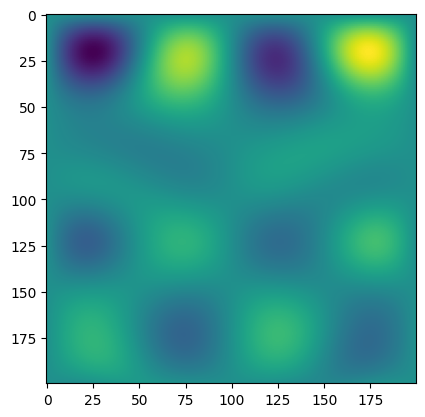

In [523]:
plt.imshow(res.reshape(X.shape))

In [345]:
multi_energy(dg, dg, np.array([[0.1]]), np.array([[0.1]]))

array([3.29189096])

In [346]:
x[75]

1.1840173317549472

In [386]:
d = np.array([0, 1, 2, 3, 4, 5, 6, 7]) -3.5
d = np.roll(d, 4)

s = np.ones(8) / np.sqrt(8)
s = s * np.exp(0.1j * d)
s = rx_multi(3, 0.1) @ s
sum(d * np.abs(s) ** 2)

-0.20411738496822568